## Observations and Insights

In [21]:
# In the study of effectiveness of Capomulin, the drug was tested on an approximately equivilant number of male and female mice. 
# This suggests the drug is effective in reducing tumor volume for all mice. Ramicane, Infubinol, Ceftamin were the other 3 drugs 
# studied. Overall, Capomulin and Ramicane were most effective . They provided similar results with 25% of final tumor 
# volumes between 25-25 mm3, with all tumor volumes smaller than tumors treated with Infubinol and Ceftamin. When testing an
# individual, treatment with Capomulin reduces the tumor volume from approximately 45 mm3 to appoximately 0 mmm3 at the end of 
# treatment. 

# Capomulin and Ramicane had roughly 230 trials each, while Infubinol and Ceftamin had only 175. These additional trials
# may account for the lower tumor volume at the end of the study. There is a positive correlation indicating the heavier 
# a mouse is, the larger the tumor will be. It is possible that the mice in the Capomulin and Ramicane trials were lighter, 
# resulting in smaller initial and final tumors. 


## Dependencies and starter code

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
# mouse_metadata
# study_results
# Combine the data into a single dataset
scc_results = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how = 'inner')
# scc_results


In [23]:
indexed_results = scc_results.set_index("Mouse ID")
#indexed_results

## Summary statistics

In [24]:
# #create a summary table
# data = {"Mean": [mean_volume], "Median": [median_volume], "Variance":[variance], "Standard Deviation":[SD_vol], "Standard Error":[SEM_vol]}
# summary_table = pd.DataFrame.from_dict(data)
summary_table= scc_results[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
slimmed_table = summary_table.groupby('Drug Regimen').agg(['mean', "median", "var", "std", "sem"])
slimmed_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar plots

Text(0, 0.5, 'Number of Trials')

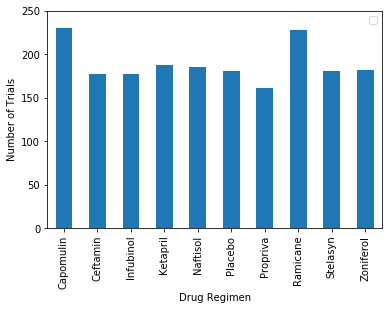

In [25]:

#count the number of trials per drug
num_of_treatments= scc_results.groupby('Drug Regimen').count()


# Generate a bar plot showing number of data points for each treatment regimen using pandas

#move drug regimens to a column
bar_ready=num_of_treatments.reset_index()

#plot the data in a bar chart
bar_chart = bar_ready.plot.bar(x='Drug Regimen', y = 'Tumor Volume (mm3)')

#resize the graph so it's easier to read
bar_chart.set_ylim((0, 250))

#remove the legend
bar_chart.legend([]);

#label the y axis
bar_chart.set_ylabel('Number of Trials')


In [26]:
# Set x axis and tick locations
x_axis = np.arange(len(bar_ready['Drug Regimen']))
tick_locations = [value+0.4 for value in x_axis]

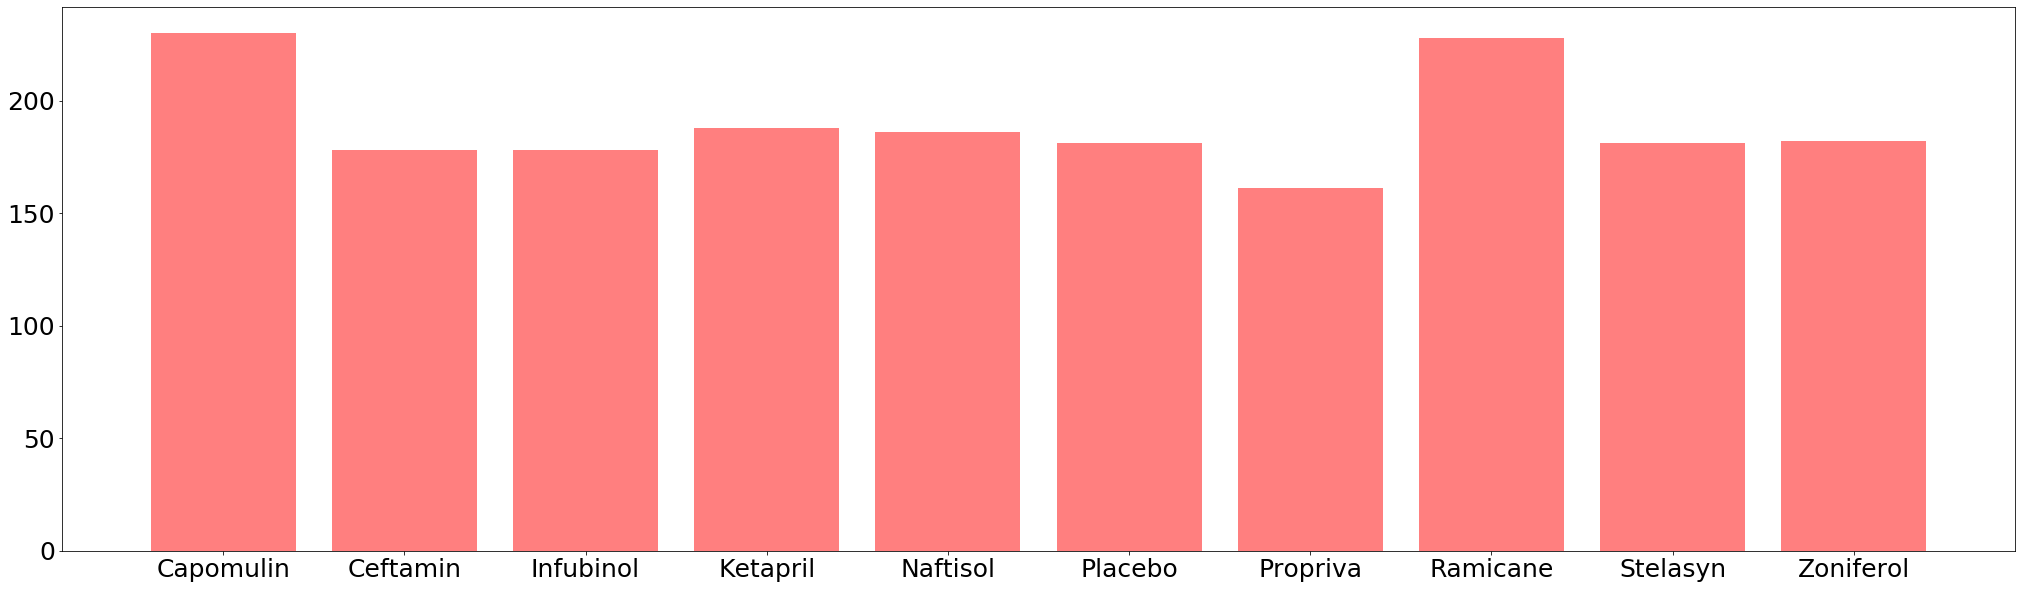

In [27]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot


# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(35,10))
plt.bar(bar_ready['Drug Regimen'], bar_ready['Tumor Volume (mm3)'], color='r', alpha=0.5, align="edge")
plt.tick_params(axis='both', labelsize=25)
plt.xticks(tick_locations, bar_ready['Drug Regimen'])
plt.show()

## Pie plots

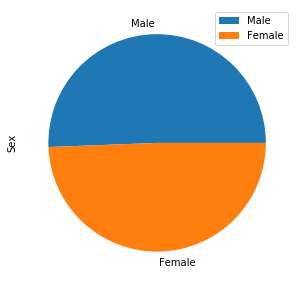

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pie_data = scc_results['Sex'].value_counts()
pie_data

pie = pie_data.plot.pie(y='Sex',figsize=(5, 5))
pie.legend(['Male', 'Female']);


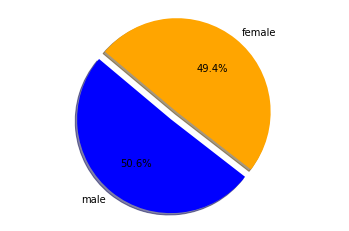

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ['male', 'female']

# The values of each section of the pie chart
sizes = scc_results['Sex'].value_counts()

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# # Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0,)

# # Creates the pie chart based upon the values above
# # Automatically finds the percentages of each part of the pie chart
plt.pie(scc_results['Sex'].value_counts(), explode=explode, labels=labels, colors=colors,
         autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [30]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
indexed_results=indexed_results.reset_index()
#indexed_results
mice= indexed_results.groupby(['Drug Regimen', "Mouse ID"]).last()
#mice
#type(mice)

In [31]:

mice.reset_index(level =0, inplace = True)
mice

#isolate Capomulin Data
drug1 =mice[mice['Drug Regimen']=="Capomulin"]
drug1
Capomulin_vol= drug1['Tumor Volume (mm3)']


In [32]:
# isolate Ramicane data
drug2 =mice[mice['Drug Regimen']=="Ramicane"]
Ramicane_vol= drug2['Tumor Volume (mm3)']

In [33]:
#isolate Infubinol data
drug3 =mice[mice['Drug Regimen']=="Infubinol"]
Infubinol_vol= drug3['Tumor Volume (mm3)']

In [34]:
#isolate Ceftamin data
drug4 =mice[mice['Drug Regimen']=="Ceftamin"]
Ceftamin_vol= drug4['Tumor Volume (mm3)']

## Quartiles, outliers and boxplots

In [35]:

#Calculate the IQR and quantitatively determine if there are any potential outliers in Capomulin.
quartiles = Capomulin_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print('Results of Capomulin Study:')
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print('------------'*10)

#Calculate the IQR and quantitatively determine if there are any potential outliers in Ramicane.
quartiles = Ramicane_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print('Results of Ramicane Study:')
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print('------------'*10)


#Calculate the IQR and quantitatively determine if there are any potential outliers in Infubinol.
quartiles = Infubinol_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print('Results of Infubinol Study:')
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print('------------'*10)

#Calculate the IQR and quantitatively determine if there are any potential outliers in Ceftamin.
quartiles = Ceftamin_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print('Results of Ceftamin Study:')
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



Results of Capomulin Study:
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
------------------------------------------------------------------------------------------------------------------------
Results of Ramicane Study:
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
------------------------------------------------------------------------------------------------------------------------
Results of Infubinol Study:
The lower quartile of tumor volume is: 54.04860769
The u

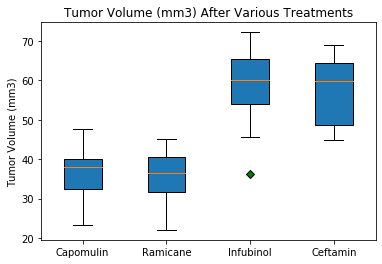

In [36]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
treatment_data = [Capomulin_vol, Ramicane_vol, Infubinol_vol, Ceftamin_vol]
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume (mm3) After Various Treatments')
ax1.set_ylabel('Tumor Volume (mm3)')
green_diamond = dict(markerfacecolor='g', marker='D')
ax1.boxplot(treatment_data, flierprops = green_diamond, patch_artist = True, labels = ['Capomulin', 'Ramicane','Infubinol', 'Ceftamin'])
plt.show()


## Line and scatter plots

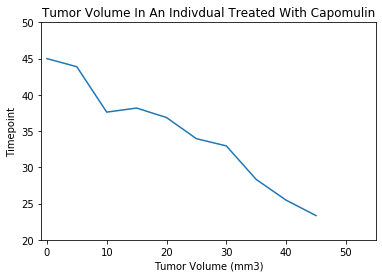

In [37]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
treatment_df= indexed_results.groupby("Drug Regimen")
Capomulin =indexed_results[indexed_results['Drug Regimen']=="Capomulin"]
Capomulin_s185=Capomulin[Capomulin['Mouse ID']=="s185"]
Capomulin_s185
Capomulin_narrowed= Capomulin_s185[['Timepoint', 'Tumor Volume (mm3)']]
plt.plot(Capomulin_s185['Timepoint'], Capomulin_s185['Tumor Volume (mm3)'])
plt.ylim(20,50)
plt.xlim(-1, 55)
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Timepoint')
plt.title('Tumor Volume In An Indivdual Treated With Capomulin')
plt.show()

The correlation between both factors is 0.88
y = 1.75x + 1.45
The r-squared is: 0.8767060403658119


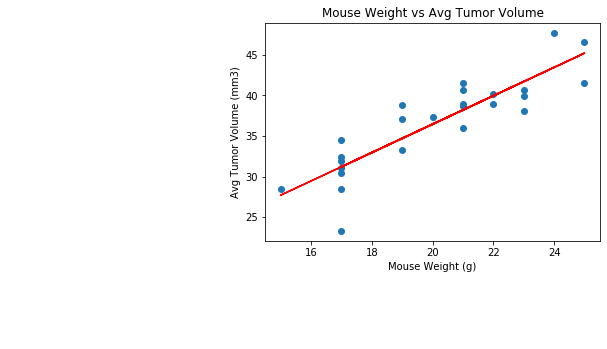

In [38]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Calculate the correlation coefficient 
#and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# correlation coefficient
correlation = st.pearsonr(drug1['Weight (g)'],drug1['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")


# Add the linear regression equation and line to plot
x_values = drug1['Weight (g)']
y_values = drug1['Tumor Volume (mm3)']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.title('Mouse Weight vs Avg Tumor Volume')
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.show()